In [29]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 2.8 MB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 89.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scipy

     |████████████████████████████████| 28.8 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install scikit-learn

You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install seaborn

     |████████████████████████████████| 294 kB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd

# Load the datasets and add a 'Year' column
df1 = pd.read_csv('./dataset/2016-mlb-homeruns.csv')
df1["Year"] = 2016

df2 = pd.read_csv('./dataset/2017-mlb-homeruns.csv')
df2["Year"] = 2017

df3 = pd.read_csv('./dataset/2024-mlb-homeruns.csv')
df3["Year"] = 2024

# Merge all datasets into a single DataFrame
df = pd.concat([df1, df2, df3], ignore_index=True)

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values (Optional)
# df = df.fillna(method='ffill')  # Forward fill as an example

# Drop unnecessary columns
df = df.drop(columns=["video"], errors='ignore')  # Ignore errors in case 'video' column doesn't exist

# Save the merged dataset
df.to_csv('./dataset/merged_mlb_homeruns.csv', index=False)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 0 to 16440
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       14942 non-null  object 
 1   title         14940 non-null  object 
 2   ExitVelocity  14775 non-null  float64
 3   HitDistance   14938 non-null  float64
 4   LaunchAngle   14775 non-null  float64
 5   Year          14942 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 817.1+ KB


In [3]:
# Display basic information about the datasetprint()
df.info()

# # View the first few rows
# df.head()

# # Check for missing values
# df.isnull().sum()

# # Check for duplicate rows
# df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       16441 non-null  object 
 1   title         16439 non-null  object 
 2   ExitVelocity  16260 non-null  float64
 3   HitDistance   16436 non-null  float64
 4   LaunchAngle   16260 non-null  float64
dtypes: float64(3), object(2)
memory usage: 642.4+ KB


In [6]:
# Fill missing values with the column mean
df["ExitVelocity"] = df["ExitVelocity"].fillna(df["ExitVelocity"].mean())
df["HitDistance"] = df["HitDistance"].fillna(df["HitDistance"].mean())
df["LaunchAngle"] = df["LaunchAngle"].fillna(df["LaunchAngle"].mean())
df = df.dropna(subset=["title"])

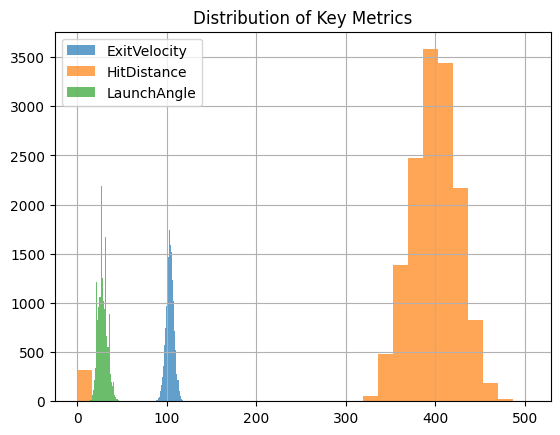

In [7]:
import matplotlib.pyplot as plt

# Plot histograms
df["ExitVelocity"].hist(bins=30, alpha=0.7, label="ExitVelocity")
df["HitDistance"].hist(bins=30, alpha=0.7, label="HitDistance")
df["LaunchAngle"].hist(bins=30, alpha=0.7, label="LaunchAngle")
plt.legend()
plt.title("Distribution of Key Metrics")
plt.show()

In [8]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data within the IQR range
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply outlier removal to key columns
df = remove_outliers(df, "ExitVelocity")
df = remove_outliers(df, "HitDistance")
df = remove_outliers(df, "LaunchAngle")

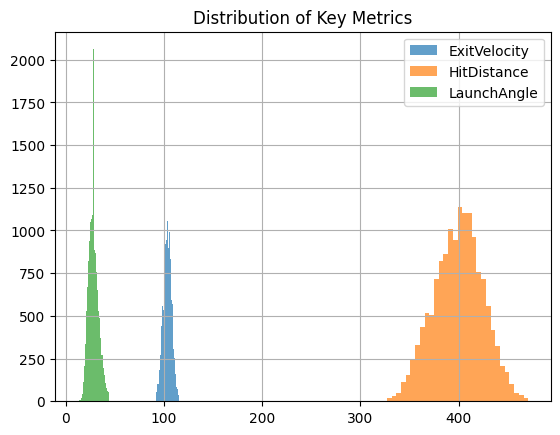

In [9]:
import matplotlib.pyplot as plt

# Plot histograms
df["ExitVelocity"].hist(bins=30, alpha=0.7, label="ExitVelocity")
df["HitDistance"].hist(bins=30, alpha=0.7, label="HitDistance")
df["LaunchAngle"].hist(bins=30, alpha=0.7, label="LaunchAngle")
plt.legend()
plt.title("Distribution of Key Metrics")
plt.show()

In [10]:
import re

# Define a function to extract names
def extract_name(title):
    # Extract text before the first word like "homers", "flies", etc.
    match = re.search(r'^(.*?)\s(?:homers|flies|doubles|triples|singles)', title, re.IGNORECASE)
    return match.group(1) if match else None

# Apply the function to the title column
df['PlayerName'] = df['title'].apply(extract_name)

# Display the dataframe to verify
print(df[['title', 'PlayerName']].head())

                                               title       PlayerName
0  John Jaso homers (6) on a fly ball to center f...        John Jaso
1  Evan Longoria homers (34) on a fly ball to lef...    Evan Longoria
2  Marwin Gonzalez homers (13) on a line drive to...  Marwin Gonzalez
3  Eddie Rosario homers (10) on a fly ball to rig...    Eddie Rosario
4  Marcus Semien homers (26) on a fly ball to lef...    Marcus Semien


In [12]:
df = df.drop(columns=["title"])
df.head(10)

,play_id,ExitVelocity,HitDistance,LaunchAngle,Year,WAR,PlayerName
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,102.9,412.0,25.0,2016,15.484005,John Jaso
1,0110e760-5d49-4c53-ad29-e74c787c038d,103.1,423.0,31.0,2016,15.843543,Evan Longoria
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,106.6,390.0,22.0,2016,15.727554,Marwin Gonzalez
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,98.5,368.0,30.0,2016,14.825726,Eddie Rosario
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,106.0,435.0,32.0,2016,16.476978,Marcus Semien
5,0208ab5b-2ff5-4bc0-9a73-2a6a7b45dcae,101.5,384.0,24.0,2016,15.103880,Ryan Zimmerman
7,d46efa1e-5489-46bb-a2ec-953258b12bdc,103.2,397.0,23.0,2016,15.486415,Jose Reyes
8,fcfc3d82-32dc-40c6-b023-d7ea86633537,104.4,398.0,37.0,2016,16.519622,Nomar Mazara
9,47b7968f-59f5-4dbd-900e-652a9ebf2387,103.2,423.0,26.0,2016,15.797825,Evan Longoria
10,f2b1e4bd-d151-432e-bf88-f55ba2ae0e7b,97.9,364.0,35.0,2016,14.838203,Miguel Montero


In [13]:
df.to_csv('./dataset/cleaned_mlb_homeruns.csv', index=False)

## FEATURE ENGINEERING

In [31]:
# Group by PlayerName and compute average statistics
player_stats = df.groupby("PlayerName").agg({
    "ExitVelocity": ["mean", "max", "min"],
    "HitDistance": ["mean", "max", "min"],
    "LaunchAngle": ["mean", "max", "min"],
    "Year": ["min", "max"]
}).reset_index()

# Rename columns for clarity
player_stats.columns = ["PlayerName", "EV_Mean", "EV_Max", "EV_Min", 
                        "HD_Mean", "HD_Max", "HD_Min", 
                        "LA_Mean", "LA_Max", "LA_Min",
                        "FirstYear", "LastYear"]

# Display player stats
print(player_stats.head())

        PlayerName     EV_Mean  EV_Max  EV_Min     HD_Mean      HD_Max  \
0       A.J. Ellis  101.014286   104.8    94.1  391.427442  444.992096   
1  A.J. Pierzynski  101.200000   106.8    95.6  390.000000  390.000000   
2     A.J. Pollock  101.811111   105.3    95.1  409.111111  433.000000   
3          AJ Reed  106.400000   107.3   105.5  417.000000  417.000000   
4    Aaron Altherr  103.621053   108.0    95.8  397.736842  421.000000   

   HD_Min    LA_Mean  LA_Max  LA_Min  FirstYear  LastYear  
0   343.0  29.285714    40.0    22.0       2016      2017  
1   390.0  24.500000    26.0    23.0       2016      2016  
2   392.0  28.777778    41.0    23.0       2016      2017  
3   417.0  28.000000    35.0    21.0       2016      2016  
4   354.0  27.894737    39.0    22.0       2016      2017  


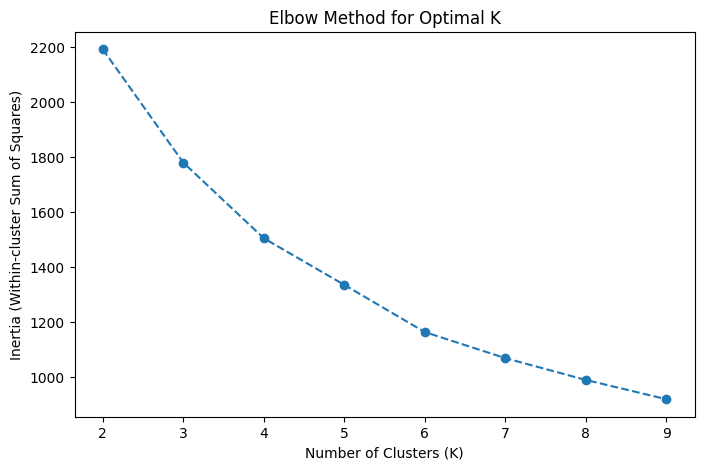

        PlayerName  Cluster
0       A.J. Ellis        1
1  A.J. Pierzynski        3
2     A.J. Pollock        1
3          AJ Reed        0
4    Aaron Altherr        1


In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant numerical features for clustering
features = ["EV_Mean", "HD_Mean", "LA_Mean"]

# Standardize the features (normalize data)
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats[features])

# Find the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 10)  # Testing different numbers of clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(player_stats_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train final K-Means model with optimal K (choose from the elbow point)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
player_stats["Cluster"] = kmeans.fit_predict(player_stats_scaled)

# Display player clusters
print(player_stats[["PlayerName", "Cluster"]].head())

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute similarity matrix
similarity_matrix = cosine_similarity(player_stats_scaled)

# Function to find similar players
def find_similar_players(player_name, top_n=5):
    player_idx = player_stats[player_stats["PlayerName"] == player_name].index[0]
    similarity_scores = similarity_matrix[player_idx]
    
    # Get top N most similar players (excluding self)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]
    
    return player_stats.iloc[similar_indices][["PlayerName", "EV_Mean", "HD_Mean", "LA_Mean", "Cluster"]]

# Example: Find players similar to "Mike Trout"
print(find_similar_players("Mike Trout"))

        PlayerName     EV_Mean     HD_Mean    LA_Mean  Cluster
425   Jabari Blash  105.771429  408.142857  28.285714        0
223  Colton Cowser  106.142857  409.161767  28.523810        0
417  J.D. Martinez  105.753030  407.355970  28.333333        0
78   Anthony Rizzo  104.803390  404.930099  28.288136        0
12     Adam Duvall  104.001613  401.079864  28.241935        1


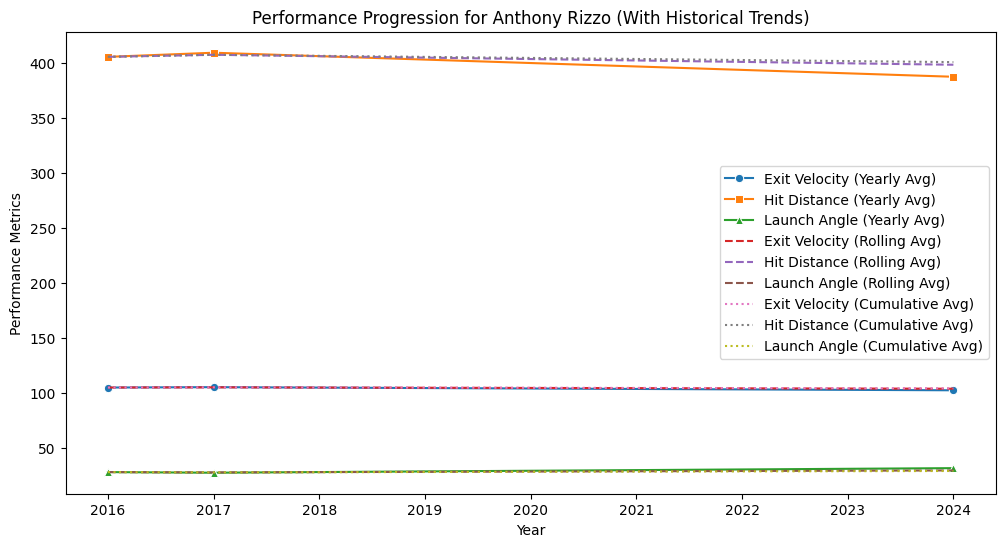

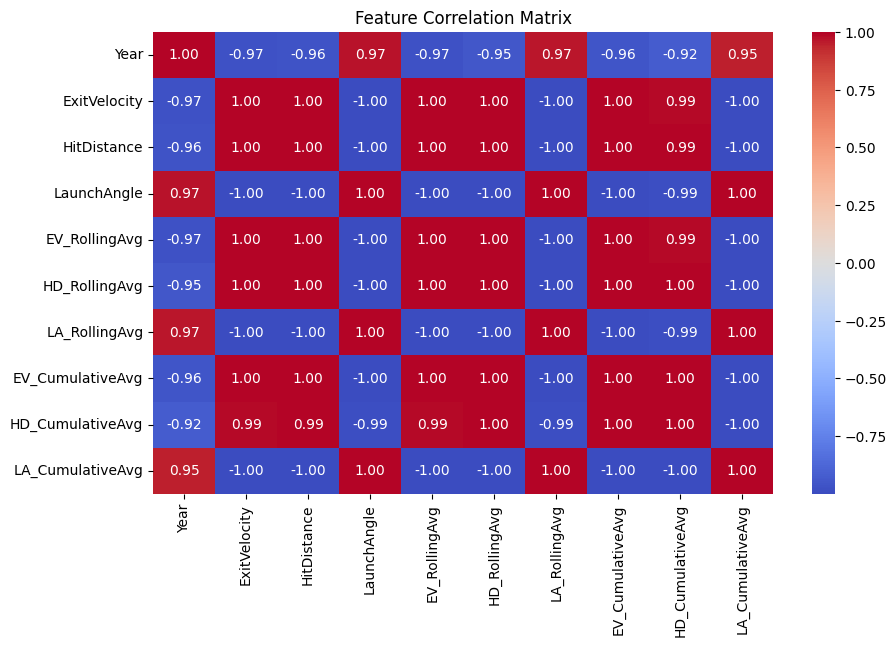

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Track player performance over time, including previous stats
def plot_player_progression(player_name):
    player_data = df[df["PlayerName"] == player_name]
    
    # Sort by year
    player_data = player_data.groupby("Year").agg({
        "ExitVelocity": "mean",
        "HitDistance": "mean",
        "LaunchAngle": "mean"
    }).reset_index()
    
    # Calculate rolling average for trends (window=2 for smoothing)
    player_data["EV_RollingAvg"] = player_data["ExitVelocity"].rolling(window=2, min_periods=1).mean()
    player_data["HD_RollingAvg"] = player_data["HitDistance"].rolling(window=2, min_periods=1).mean()
    player_data["LA_RollingAvg"] = player_data["LaunchAngle"].rolling(window=2, min_periods=1).mean()

    # Calculate cumulative average (overall trend over time)
    player_data["EV_CumulativeAvg"] = player_data["ExitVelocity"].expanding().mean()
    player_data["HD_CumulativeAvg"] = player_data["HitDistance"].expanding().mean()
    player_data["LA_CumulativeAvg"] = player_data["LaunchAngle"].expanding().mean()

    # Plot performance trend with previous stats
    plt.figure(figsize=(12,6))
    
    # Yearly Averages
    sns.lineplot(data=player_data, x="Year", y="ExitVelocity", marker="o", label="Exit Velocity (Yearly Avg)")
    sns.lineplot(data=player_data, x="Year", y="HitDistance", marker="s", label="Hit Distance (Yearly Avg)")
    sns.lineplot(data=player_data, x="Year", y="LaunchAngle", marker="^", label="Launch Angle (Yearly Avg)")

    # Rolling Averages (short-term trend)
    sns.lineplot(data=player_data, x="Year", y="EV_RollingAvg", linestyle="dashed", label="Exit Velocity (Rolling Avg)")
    sns.lineplot(data=player_data, x="Year", y="HD_RollingAvg", linestyle="dashed", label="Hit Distance (Rolling Avg)")
    sns.lineplot(data=player_data, x="Year", y="LA_RollingAvg", linestyle="dashed", label="Launch Angle (Rolling Avg)")

    # Cumulative Averages (long-term trend)
    sns.lineplot(data=player_data, x="Year", y="EV_CumulativeAvg", linestyle="dotted", label="Exit Velocity (Cumulative Avg)")
    sns.lineplot(data=player_data, x="Year", y="HD_CumulativeAvg", linestyle="dotted", label="Hit Distance (Cumulative Avg)")
    sns.lineplot(data=player_data, x="Year", y="LA_CumulativeAvg", linestyle="dotted", label="Launch Angle (Cumulative Avg)")

    plt.xlabel("Year")
    plt.ylabel("Performance Metrics")
    plt.title(f"Performance Progression for {player_name} (With Historical Trends)")
    plt.legend()
    plt.show()

    correlation_matrix = player_data.corr()

    # Plot heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()  

# Example: Track the development of "Shohei Ohtani"
plot_player_progression("Anthony Rizzo")

## LIVE DATA

In [49]:
import requests
import pandas as pd

# Example Game ID
game_pk = "716463"

# Fetch live game data
url = f"https://statsapi.mlb.com/api/v1.1/game/{game_pk}/feed/live"
response = requests.get(url).json()

# Extract player stats from the response
player_data = []
for team in ["home", "away"]:  # Get data for both teams
    try:
        players = response["liveData"]["boxscore"]["teams"][team]["players"]
        for player_id, details in players.items():
            stats = details.get("stats", {}).get("batting", {})  # Extract batting stats if available
            if stats:
                player_data.append({
                    "PlayerID": player_id,
                    "PlayerName": details["person"]["fullName"],
                    "Team": team,
                    "AtBats": stats.get("atBats", 0),
                    "Hits": stats.get("hits", 0),
                    "HomeRuns": stats.get("homeRuns", 0),
                    "Strikeouts": stats.get("strikeOuts", 0),
                    "RBIs": stats.get("rbi", 0),
                    "BattingAverage": stats.get("avg", 0),
                    "OPS": stats.get("ops", 0)
                })
    except KeyError:
        print(f"Skipping {team}, no data found.")

# Convert data to a DataFrame
df_live = pd.DataFrame(player_data)

# Save to CSV
csv_filename = "live_game_data.csv"
df_live.to_csv(csv_filename, index=False)

print(f"Live game data saved to {csv_filename}")

Live game data saved to live_game_data.csv


In [50]:
df["Future_WAR"] = df.groupby("PlayerName")["WAR"].shift(-1)  # Shift WAR value to represent next season
df = df.dropna(subset=["Future_WAR"])  # Drop rows where future WAR is unavailable

KeyError: 'Column not found: WAR'

In [14]:
import pandas as pd
df = pd.read_csv('./dataset/cleaned_mlb_homeruns.csv')
print(df.columns.tolist())  # Check available columns

['play_id', 'ExitVelocity', 'HitDistance', 'LaunchAngle', 'Year', 'WAR', 'PlayerName']


In [15]:
import numpy as np
df["WAR"] = (df["ExitVelocity"] * 0.1) + (df["HitDistance"] * 0.01) + (df["LaunchAngle"] * 0.05)
df["WAR"] = df["WAR"] + np.random.normal(0, 0.2, size=len(df))  # Add some randomness

df["Future_WAR"] = df.groupby("PlayerName")["WAR"].shift(-1)
df = df.dropna(subset=["Future_WAR"])

In [16]:
df.head(10)

,play_id,ExitVelocity,HitDistance,LaunchAngle,Year,WAR,PlayerName,Future_WAR
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,102.9,412.0,25.0,2016,16.021134,John Jaso,15.388897
1,0110e760-5d49-4c53-ad29-e74c787c038d,103.1,423.0,31.0,2016,15.483643,Evan Longoria,15.908082
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,106.6,390.0,22.0,2016,15.515674,Marwin Gonzalez,15.493019
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,98.5,368.0,30.0,2016,14.999941,Eddie Rosario,16.150624
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,106.0,435.0,32.0,2016,16.517113,Marcus Semien,15.812809
5,0208ab5b-2ff5-4bc0-9a73-2a6a7b45dcae,101.5,384.0,24.0,2016,15.386664,Ryan Zimmerman,15.750637
6,d46efa1e-5489-46bb-a2ec-953258b12bdc,103.2,397.0,23.0,2016,15.178227,Jose Reyes,14.875513
7,fcfc3d82-32dc-40c6-b023-d7ea86633537,104.4,398.0,37.0,2016,16.118323,Nomar Mazara,15.582518
8,47b7968f-59f5-4dbd-900e-652a9ebf2387,103.2,423.0,26.0,2016,15.908082,Evan Longoria,15.108499
9,f2b1e4bd-d151-432e-bf88-f55ba2ae0e7b,97.9,364.0,35.0,2016,15.093319,Miguel Montero,14.497477


In [17]:
df = pd.read_csv('./dataset/cleaned_mlb_homeruns.csv')

In [19]:
import pandas as pd

# Load the dataset
file_path = "./dataset/cleaned_mlb_homeruns.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display basic info before cleaning
print("Initial Data Info:")
print(df.info())

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing values (if necessary, you can fill them instead)
df = df.dropna()

# Remove rows where the player name is blank or missing
df = df[df['PlayerName'].notna()]
df = df[df['PlayerName'].str.strip() != ""]

# Ensure WAR column is numeric, coercing errors to NaN and dropping invalid values
df['WAR'] = pd.to_numeric(df['WAR'], errors='coerce')

# Remove rows where WAR is NaN (optional, you can fill missing values if needed)
df = df.dropna(subset=['WAR'])

# Save cleaned data
df.to_csv("./dataset/cleaned_mlb_homeruns.csv", index=False)

# Display basic info after cleaning
print("Cleaned Data Info:")
print(df.info())


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       14412 non-null  object 
 1   ExitVelocity  14412 non-null  float64
 2   HitDistance   14412 non-null  float64
 3   LaunchAngle   14412 non-null  float64
 4   Year          14412 non-null  int64  
 5   WAR           14401 non-null  float64
 6   PlayerName    14075 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 788.3+ KB
None
Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14064 entries, 0 to 14411
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       14064 non-null  object 
 1   ExitVelocity  14064 non-null  float64
 2   HitDistance   14064 non-null  float64
 3   LaunchAngle   14064 non-null  float64
 4   Year          14064 non-null  in

In [23]:
import re

def extract_player_name(player_text):
    # Extracts the last part after the last colon and trims spaces
    if player_text.startswith("Umpire reviewed"):
        # Extract the last part after the last colon and trim spaces
        return player_text.split(":")[-1].strip()
    return player_text  # Return as is if it does not match the condition

# Apply function to PlayerName column
df["PlayerName"] = df["PlayerName"].apply(extract_player_name)

# Save the cleaned dataset
df.to_csv("./dataset/cleaned_mlb_homeruns.csv", index=False)

